In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
import tensorflow as tf
import keras

In [4]:
path = 'data/'

In [5]:
energy = pd.read_csv(path+'energy.csv')

In [6]:
energy['dangjin_floating'] = energy['dangjin_floating'].fillna(0)
energy['dangjin_warehouse'] = energy['dangjin_warehouse'].fillna(0)

In [7]:
def convert_time(x):
    Ymd, HMS = x.split(' ')
    H, M, S = HMS.split(':')
    H = str(int(H)-1)
    HMS = ':'.join([H, M, S])
    return ' '.join([Ymd, HMS])

In [8]:
energy['time'] = energy['time'].apply(lambda x:convert_time(x))

In [9]:
energy['time'] = pd.to_datetime(energy['time'])

In [10]:
energy = energy.astype({'dangjin': 'float32'})
energy = energy.astype({'ulsan': 'float32'})

In [11]:
energy = energy.set_index('time')

In [12]:
energy.dtypes

dangjin_floating     float64
dangjin_warehouse    float64
dangjin              float32
ulsan                float32
dtype: object

In [13]:
X_train = energy[:'2020-12-31 23:00:00']
X_valid = energy['2020-01-01 00:00:00':'2021-01-31 23:00:00']
X_train.shape, X_valid.shape

((24888, 4), (9528, 4))

In [14]:
def my_split_window(series, window):
    '''
    the series is split in (len(series)-window)-blocks of window size, 
    y is the next value that comes after the block, 
    every block starts with the next value in the series.
    The last block ends with the last-but-one value in the series.
    '''
    X = []
    y = []
    n_steps = len(series) - window
    for step in range(n_steps):
        X.append(series[step:window+step])
        y.append(series[step + window])
    X = np.array(X)
    y = np.array(y)
    return X, y

In [15]:
train_power_series1 = energy.dangjin_floating.values
window = 672
X, y = my_split_window(train_power_series1, window)

Epoch 1/600
780/780 [==============================] - 12s 15ms/step - loss: 50.8903
Epoch 2/600
780/780 [==============================] - 11s 14ms/step - loss: 32.9103
Epoch 3/600
780/780 [==============================] - 10s 13ms/step - loss: 30.1740
Epoch 4/600
780/780 [==============================] - 10s 13ms/step - loss: 28.6992
Epoch 5/600
780/780 [==============================] - 11s 14ms/step - loss: 28.3454
Epoch 6/600
780/780 [==============================] - 10s 13ms/step - loss: 27.3655
Epoch 7/600
780/780 [==============================] - 11s 14ms/step - loss: 26.8689
Epoch 8/600
780/780 [==============================] - 10s 13ms/step - loss: 26.3307
Epoch 9/600
780/780 [==============================] - 11s 14ms/step - loss: 25.2049
Epoch 10/600
780/780 [==============================] - 11s 14ms/step - loss: 25.1184
Epoch 11/600
780/780 [==============================] - 10s 13ms/step - loss: 24.7271
Epoch 12/600
780/780 [==============================] - 11s 14m

780/780 [==============================] - 10s 12ms/step - loss: 8.1739
Epoch 97/600
780/780 [==============================] - 10s 13ms/step - loss: 8.2881
Epoch 98/600
780/780 [==============================] - 10s 13ms/step - loss: 8.0744
Epoch 99/600
780/780 [==============================] - 11s 14ms/step - loss: 7.8958 1s  - ETA: 0s -
Epoch 100/600
780/780 [==============================] - 10s 13ms/step - loss: 7.8852
Epoch 101/600
780/780 [==============================] - 10s 12ms/step - loss: 7.8292
Epoch 102/600
780/780 [==============================] - 10s 13ms/step - loss: 7.9420
Epoch 103/600
780/780 [==============================] - 10s 12ms/step - loss: 7.7521 0s - loss
Epoch 104/600
780/780 [==============================] - 9s 12ms/step - loss: 7.5959
Epoch 105/600
780/780 [==============================] - 9s 12ms/step - loss: 7.7728
Epoch 106/600
780/780 [==============================] - 9s 12ms/step - loss: 7.4480
Epoch 107/600
780/780 [=========================

780/780 [==============================] - 10s 13ms/step - loss: 5.2641
Epoch 191/600
780/780 [==============================] - 10s 13ms/step - loss: 5.1416
Epoch 192/600
780/780 [==============================] - 10s 13ms/step - loss: 5.1218
Epoch 193/600
780/780 [==============================] - 10s 13ms/step - loss: 5.0831
Epoch 194/600
780/780 [==============================] - 10s 13ms/step - loss: 5.1119
Epoch 195/600
780/780 [==============================] - 10s 13ms/step - loss: 5.0232
Epoch 196/600
780/780 [==============================] - 10s 13ms/step - loss: 4.9614
Epoch 197/600
780/780 [==============================] - 10s 13ms/step - loss: 4.9721
Epoch 198/600
780/780 [==============================] - 10s 13ms/step - loss: 5.0494
Epoch 199/600
780/780 [==============================] - 10s 13ms/step - loss: 4.9208
Epoch 200/600
780/780 [==============================] - 10s 13ms/step - loss: 5.3422
Epoch 201/600
780/780 [==============================] - 10s 13ms/st

780/780 [==============================] - 12s 16ms/step - loss: 4.3999
Epoch 285/600
780/780 [==============================] - 10s 13ms/step - loss: 4.2325
Epoch 286/600
780/780 [==============================] - 12s 15ms/step - loss: 4.1915
Epoch 287/600
780/780 [==============================] - 14s 18ms/step - loss: 3.9610
Epoch 288/600
780/780 [==============================] - 12s 15ms/step - loss: 4.2074
Epoch 289/600
780/780 [==============================] - 11s 14ms/step - loss: 4.1593
Epoch 290/600
780/780 [==============================] - 12s 15ms/step - loss: 4.1196  - ETA: 0s - loss: 4.1
Epoch 291/600
780/780 [==============================] - 11s 14ms/step - loss: 4.2404
Epoch 292/600
780/780 [==============================] - 13s 16ms/step - loss: 4.2542
Epoch 293/600
780/780 [==============================] - 11s 15ms/step - loss: 4.1830
Epoch 294/600
780/780 [==============================] - 12s 15ms/step - loss: 4.0427
Epoch 295/600
780/780 [======================

780/780 [==============================] - 9s 12ms/step - loss: 3.6475
Epoch 379/600
780/780 [==============================] - 9s 12ms/step - loss: 3.7463
Epoch 380/600
780/780 [==============================] - 9s 12ms/step - loss: 3.7047
Epoch 381/600
780/780 [==============================] - 9s 12ms/step - loss: 3.5642
Epoch 382/600
780/780 [==============================] - 9s 12ms/step - loss: 3.7232
Epoch 383/600
780/780 [==============================] - 9s 12ms/step - loss: 3.7281
Epoch 384/600
780/780 [==============================] - 9s 12ms/step - loss: 3.6799
Epoch 385/600
780/780 [==============================] - 9s 12ms/step - loss: 3.5673
Epoch 386/600
780/780 [==============================] - 9s 12ms/step - loss: 3.8686
Epoch 387/600
780/780 [==============================] - 9s 12ms/step - loss: 3.5235: 0s - loss: 3.5
Epoch 388/600
780/780 [==============================] - 9s 12ms/step - loss: 3.6653
Epoch 389/600
780/780 [==============================] - 9s 12m

780/780 [==============================] - 9s 12ms/step - loss: 3.4697
Epoch 474/600
780/780 [==============================] - 9s 12ms/step - loss: 3.3827
Epoch 475/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2128
Epoch 476/600
780/780 [==============================] - 9s 12ms/step - loss: 3.4102
Epoch 477/600
780/780 [==============================] - 9s 12ms/step - loss: 3.4589
Epoch 478/600
780/780 [==============================] - 9s 12ms/step - loss: 3.3804
Epoch 479/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2781: 0s - loss:
Epoch 480/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2940
Epoch 481/600
780/780 [==============================] - 9s 12ms/step - loss: 3.3259
Epoch 482/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2380
Epoch 483/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2683
Epoch 484/600
780/780 [==============================] - 9s 12ms/st

780/780 [==============================] - 27s 35ms/step - loss: 3.1059
Epoch 568/600
780/780 [==============================] - 28s 36ms/step - loss: 3.1457
Epoch 569/600
780/780 [==============================] - 26s 34ms/step - loss: 3.3541
Epoch 570/600
780/780 [==============================] - 26s 34ms/step - loss: 3.0684
Epoch 571/600
780/780 [==============================] - 26s 33ms/step - loss: 3.1110
Epoch 572/600
780/780 [==============================] - 26s 33ms/step - loss: 3.1436
Epoch 573/600
780/780 [==============================] - 25s 32ms/step - loss: 3.0482
Epoch 574/600
780/780 [==============================] - 28s 36ms/step - loss: 2.9862
Epoch 575/600
780/780 [==============================] - 25s 33ms/step - loss: 3.0230
Epoch 576/600
780/780 [==============================] - 25s 32ms/step - loss: 3.2030
Epoch 577/600
780/780 [==============================] - 25s 32ms/step - loss: 3.1416
Epoch 578/600
780/780 [==============================] - 26s 33ms/st

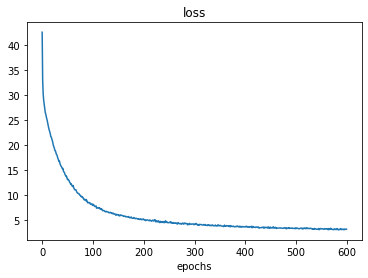

In [16]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu', 
                                 input_shape=(window, n_features)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mae') 
# fit model
history = model.fit(X, y, epochs=600, verbose=1)

# graph of the loss shows convergence
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('loss')
plt.xlabel('epochs')
plt.show()

In [17]:
# predicting next year
x_input = np.array(X_train.dangjin_floating[-672:]) #  next value based on data of last year
x_input = x_input.reshape((1, window, n_features)) # the model expects three dimensions as input (samples, window, features)

for i in range(672):
    y_hat = model.predict(x_input, verbose=1)
    new_x = y_hat.reshape((1,1,1))
    x_input = np.concatenate((x_input[:, -671:], new_x), axis=1)

1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 18ms/step


1/1 [==============================] - 0s 33ms/step


1/1 [==============================] - 0s 26ms/step


1/1 [==============================] - 0s 36ms/step


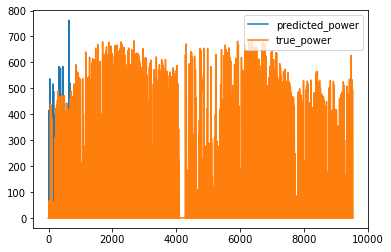

In [18]:
y_predicted = x_input.reshape((x_input.shape[1]))
plt.plot(y_predicted, label='predicted_power')

y_true = X_valid.dangjin_floating.values
plt.plot(y_true, label='true_power')
plt.legend()
plt.show()

In [19]:
train_power_series2 = energy.dangjin_warehouse.values
window = 672
X, y = my_split_window(train_power_series2, window)

In [20]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu', 
                                 input_shape=(window, n_features)))
model1.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model1.add(tf.keras.layers.Flatten())
model1.add(tf.keras.layers.Dense(50, activation='relu'))
model1.add(tf.keras.layers.Dense(1))
model1.compile(optimizer='adam', loss='mae') 
# fit model
history1 = model1.fit(X, y, epochs=600, verbose=1)

Epoch 1/600
780/780 [==============================] - ETA: 0s - loss: 46.16 - 18s 23ms/step - loss: 46.1518
Epoch 2/600
780/780 [==============================] - 18s 23ms/step - loss: 28.2308
Epoch 3/600
780/780 [==============================] - 18s 23ms/step - loss: 24.2694
Epoch 4/600
780/780 [==============================] - 16s 21ms/step - loss: 23.44150s - loss: 23.
Epoch 5/600
780/780 [==============================] - 16s 20ms/step - loss: 22.6624
Epoch 6/600
780/780 [==============================] - 16s 20ms/step - loss: 21.9573
Epoch 7/600
780/780 [==============================] - 16s 20ms/step - loss: 21.6759
Epoch 8/600
780/780 [==============================] - 15s 20ms/step - loss: 21.3794
Epoch 9/600
780/780 [==============================] - 15s 20ms/step - loss: 20.9553
Epoch 10/600
780/780 [==============================] - 19s 25ms/step - loss: 21.0864
Epoch 11/600
780/780 [==============================] - 32s 41ms/step - loss: 20.38120s -
Epoch 12/600
780/780 

780/780 [==============================] - 12s 15ms/step - loss: 10.1702
Epoch 96/600
780/780 [==============================] - 12s 15ms/step - loss: 10.1377
Epoch 97/600
780/780 [==============================] - 12s 15ms/step - loss: 9.8584
Epoch 98/600
780/780 [==============================] - 12s 15ms/step - loss: 9.8030
Epoch 99/600
780/780 [==============================] - 12s 15ms/step - loss: 9.8880
Epoch 100/600
780/780 [==============================] - 12s 16ms/step - loss: 9.6277
Epoch 101/600
780/780 [==============================] - 12s 16ms/step - loss: 9.8056
Epoch 102/600
780/780 [==============================] - 12s 15ms/step - loss: 9.6735
Epoch 103/600
780/780 [==============================] - 12s 16ms/step - loss: 9.5755
Epoch 104/600
780/780 [==============================] - 12s 15ms/step - loss: 9.8606
Epoch 105/600
780/780 [==============================] - 12s 15ms/step - loss: 9.6420
Epoch 106/600
780/780 [==============================] - 12s 15ms/step

780/780 [==============================] - 10s 12ms/step - loss: 7.0756
Epoch 190/600
780/780 [==============================] - 10s 12ms/step - loss: 6.8041
Epoch 191/600
780/780 [==============================] - 10s 12ms/step - loss: 6.6799
Epoch 192/600
780/780 [==============================] - 10s 12ms/step - loss: 6.8375
Epoch 193/600
780/780 [==============================] - 10s 12ms/step - loss: 6.8109
Epoch 194/600
780/780 [==============================] - 10s 12ms/step - loss: 6.7912
Epoch 195/600
780/780 [==============================] - 10s 12ms/step - loss: 6.7847
Epoch 196/600
780/780 [==============================] - 10s 13ms/step - loss: 6.9313
Epoch 197/600
780/780 [==============================] - 10s 12ms/step - loss: 6.5075
Epoch 198/600
780/780 [==============================] - 10s 12ms/step - loss: 6.6081
Epoch 199/600
780/780 [==============================] - 10s 12ms/step - loss: 6.6173
Epoch 200/600
780/780 [==============================] - 10s 12ms/st

780/780 [==============================] - 11s 14ms/step - loss: 5.4197
Epoch 284/600
780/780 [==============================] - 10s 13ms/step - loss: 5.3206
Epoch 285/600
780/780 [==============================] - 11s 14ms/step - loss: 5.3560
Epoch 286/600
780/780 [==============================] - 11s 14ms/step - loss: 5.4578
Epoch 287/600
780/780 [==============================] - 11s 14ms/step - loss: 5.4519
Epoch 288/600
780/780 [==============================] - 11s 13ms/step - loss: 5.2756
Epoch 289/600
780/780 [==============================] - 11s 14ms/step - loss: 5.1848
Epoch 290/600
780/780 [==============================] - 10s 13ms/step - loss: 5.3036
Epoch 291/600
780/780 [==============================] - 11s 14ms/step - loss: 5.3375
Epoch 292/600
780/780 [==============================] - 10s 13ms/step - loss: 5.5133
Epoch 293/600
780/780 [==============================] - 11s 14ms/step - loss: 5.4250
Epoch 294/600
780/780 [==============================] - 11s 13ms/st

780/780 [==============================] - 10s 13ms/step - loss: 4.5471
Epoch 379/600
780/780 [==============================] - 10s 13ms/step - loss: 4.5940
Epoch 380/600
780/780 [==============================] - 10s 13ms/step - loss: 4.7057
Epoch 381/600
780/780 [==============================] - 10s 13ms/step - loss: 4.4381
Epoch 382/600
780/780 [==============================] - 10s 13ms/step - loss: 4.7218
Epoch 383/600
780/780 [==============================] - 10s 13ms/step - loss: 4.5531
Epoch 384/600
780/780 [==============================] - 11s 14ms/step - loss: 4.6695
Epoch 385/600
780/780 [==============================] - 10s 13ms/step - loss: 4.5415
Epoch 386/600
780/780 [==============================] - 10s 13ms/step - loss: 4.5758
Epoch 387/600
780/780 [==============================] - 10s 13ms/step - loss: 4.4517
Epoch 388/600
780/780 [==============================] - 10s 13ms/step - loss: 4.5602
Epoch 389/600
780/780 [==============================] - 10s 13ms/st

780/780 [==============================] - 10s 13ms/step - loss: 3.9381
Epoch 474/600
780/780 [==============================] - 10s 13ms/step - loss: 3.9673
Epoch 475/600
780/780 [==============================] - 11s 14ms/step - loss: 4.1699
Epoch 476/600
780/780 [==============================] - 10s 13ms/step - loss: 4.0519
Epoch 477/600
780/780 [==============================] - 10s 13ms/step - loss: 4.2106
Epoch 478/600
780/780 [==============================] - 10s 13ms/step - loss: 4.0194
Epoch 479/600
780/780 [==============================] - 10s 13ms/step - loss: 3.9945
Epoch 480/600
780/780 [==============================] - 10s 13ms/step - loss: 3.9813
Epoch 481/600
780/780 [==============================] - 10s 13ms/step - loss: 3.9169
Epoch 482/600
780/780 [==============================] - 10s 13ms/step - loss: 3.9992
Epoch 483/600
780/780 [==============================] - 10s 13ms/step - loss: 3.9628
Epoch 484/600
780/780 [==============================] - 10s 13ms/st

780/780 [==============================] - 10s 13ms/step - loss: 3.7423
Epoch 569/600
780/780 [==============================] - 10s 13ms/step - loss: 3.5562
Epoch 570/600
780/780 [==============================] - 10s 13ms/step - loss: 3.7992
Epoch 571/600
780/780 [==============================] - 10s 13ms/step - loss: 3.8481
Epoch 572/600
780/780 [==============================] - 10s 13ms/step - loss: 3.6206
Epoch 573/600
780/780 [==============================] - 10s 13ms/step - loss: 3.7739
Epoch 574/600
780/780 [==============================] - 10s 13ms/step - loss: 3.6830
Epoch 575/600
780/780 [==============================] - 10s 13ms/step - loss: 3.5839
Epoch 576/600
780/780 [==============================] - 10s 13ms/step - loss: 3.6047
Epoch 577/600
780/780 [==============================] - 10s 13ms/step - loss: 3.5591
Epoch 578/600
780/780 [==============================] - 10s 13ms/step - loss: 3.4926
Epoch 579/600
780/780 [==============================] - 11s 13ms/st

In [21]:
# predicting next year
x_input1 = np.array(X_train.dangjin_warehouse[-672:]) #  next value based on data of last year
x_input1 = x_input1.reshape((1, window, n_features)) # the model expects three dimensions as input (samples, window, features)

for i in range(672):
    y_hat1 = model1.predict(x_input1, verbose=1)
    new_x1 = y_hat1.reshape((1,1,1))
    x_input1 = np.concatenate((x_input1[:, -671:], new_x1), axis=1)

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 14ms/step


1/1 [==============================] - 0s 17ms/step


1/1 [==============================] - 0s 13ms/step


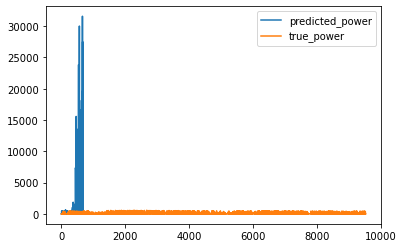

In [22]:
y_predicted1 = x_input1.reshape((x_input1.shape[1]))
plt.plot(y_predicted1, label='predicted_power')

y_true1 = X_valid.dangjin_warehouse.values
plt.plot(y_true1, label='true_power')
plt.legend()
plt.show()

In [23]:
train_power_series3 = energy.dangjin.values
window = 672
X, y = my_split_window(train_power_series3, window)

In [24]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu', 
                                 input_shape=(window, n_features)))
model2.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(50, activation='relu'))
model2.add(tf.keras.layers.Dense(1))
model2.compile(optimizer='adam', loss='mae') 
# fit model
history2 = model2.fit(X, y, epochs=600, verbose=1)

Epoch 1/600
780/780 [==============================] - 10s 13ms/step - loss: 65.0168
Epoch 2/600
780/780 [==============================] - 10s 13ms/step - loss: 39.9602
Epoch 3/600
780/780 [==============================] - 10s 13ms/step - loss: 36.2933
Epoch 4/600
780/780 [==============================] - 10s 13ms/step - loss: 33.5119
Epoch 5/600
780/780 [==============================] - 10s 13ms/step - loss: 33.6457
Epoch 6/600
780/780 [==============================] - 10s 13ms/step - loss: 32.1273
Epoch 7/600
780/780 [==============================] - 10s 13ms/step - loss: 31.9592
Epoch 8/600
780/780 [==============================] - 10s 13ms/step - loss: 31.4211
Epoch 9/600
780/780 [==============================] - 10s 13ms/step - loss: 30.0107
Epoch 10/600
780/780 [==============================] - 10s 13ms/step - loss: 30.0909
Epoch 11/600
780/780 [==============================] - 10s 13ms/step - loss: 29.7923
Epoch 12/600
780/780 [==============================] - 10s 13m

780/780 [==============================] - 10s 13ms/step - loss: 12.0040
Epoch 96/600
780/780 [==============================] - 10s 13ms/step - loss: 12.2469
Epoch 97/600
780/780 [==============================] - 10s 13ms/step - loss: 11.9075
Epoch 98/600
780/780 [==============================] - 10s 13ms/step - loss: 11.3703
Epoch 99/600
780/780 [==============================] - 10s 13ms/step - loss: 11.4326
Epoch 100/600
780/780 [==============================] - 10s 13ms/step - loss: 11.1890
Epoch 101/600
780/780 [==============================] - 10s 13ms/step - loss: 10.9132
Epoch 102/600
780/780 [==============================] - 10s 13ms/step - loss: 10.7749
Epoch 103/600
780/780 [==============================] - 10s 13ms/step - loss: 11.1031
Epoch 104/600
780/780 [==============================] - 10s 13ms/step - loss: 11.3735
Epoch 105/600
780/780 [==============================] - 10s 13ms/step - loss: 10.8063
Epoch 106/600
780/780 [==============================] - 10s 

780/780 [==============================] - 9s 12ms/step - loss: 7.1772
Epoch 190/600
780/780 [==============================] - 9s 12ms/step - loss: 7.2326
Epoch 191/600
780/780 [==============================] - 9s 12ms/step - loss: 7.3257
Epoch 192/600
780/780 [==============================] - 9s 12ms/step - loss: 7.2466
Epoch 193/600
780/780 [==============================] - 10s 12ms/step - loss: 7.0972
Epoch 194/600
780/780 [==============================] - 10s 12ms/step - loss: 6.9259 
Epoch 195/600
780/780 [==============================] - 9s 12ms/step - loss: 7.1331
Epoch 196/600
780/780 [==============================] - 9s 12ms/step - loss: 7.1717
Epoch 197/600
780/780 [==============================] - 9s 12ms/step - loss: 6.9211
Epoch 198/600
780/780 [==============================] - 9s 12ms/step - loss: 7.3177
Epoch 199/600
780/780 [==============================] - 9s 12ms/step - loss: 7.0887
Epoch 200/600
780/780 [==============================] - 9s 12ms/step - loss

780/780 [==============================] - 9s 12ms/step - loss: 5.6362
Epoch 285/600
780/780 [==============================] - 9s 12ms/step - loss: 5.7033
Epoch 286/600
780/780 [==============================] - 9s 12ms/step - loss: 5.7006
Epoch 287/600
780/780 [==============================] - 9s 12ms/step - loss: 5.6616: 0s - loss: 5.
Epoch 288/600
780/780 [==============================] - 9s 12ms/step - loss: 5.7424
Epoch 289/600
780/780 [==============================] - 9s 12ms/step - loss: 5.6840
Epoch 290/600
780/780 [==============================] - 9s 12ms/step - loss: 5.3037
Epoch 291/600
780/780 [==============================] - 9s 12ms/step - loss: 5.5406
Epoch 292/600
780/780 [==============================] - 9s 12ms/step - loss: 5.4399
Epoch 293/600
780/780 [==============================] - 9s 12ms/step - loss: 5.5680
Epoch 294/600
780/780 [==============================] - 9s 12ms/step - loss: 5.5050
Epoch 295/600
780/780 [==============================] - 9s 12ms

780/780 [==============================] - 10s 12ms/step - loss: 4.7861
Epoch 378/600
780/780 [==============================] - 10s 12ms/step - loss: 4.7552
Epoch 379/600
780/780 [==============================] - 10s 12ms/step - loss: 4.7014
Epoch 380/600
780/780 [==============================] - 9s 12ms/step - loss: 4.8726
Epoch 381/600
780/780 [==============================] - 10s 12ms/step - loss: 4.7041
Epoch 382/600
780/780 [==============================] - 9s 12ms/step - loss: 4.6637
Epoch 383/600
780/780 [==============================] - 10s 13ms/step - loss: 4.6768
Epoch 384/600
780/780 [==============================] - 10s 12ms/step - loss: 4.5593
Epoch 385/600
780/780 [==============================] - 10s 12ms/step - loss: 4.7840
Epoch 386/600
780/780 [==============================] - 10s 12ms/step - loss: 4.7917
Epoch 387/600
780/780 [==============================] - 10s 12ms/step - loss: 4.6591
Epoch 388/600
780/780 [==============================] - 10s 12ms/step

780/780 [==============================] - 10s 12ms/step - loss: 4.5737
Epoch 473/600
780/780 [==============================] - 10s 13ms/step - loss: 4.2775
Epoch 474/600
780/780 [==============================] - 10s 13ms/step - loss: 4.2369
Epoch 475/600
780/780 [==============================] - 9s 12ms/step - loss: 4.3610
Epoch 476/600
780/780 [==============================] - 9s 12ms/step - loss: 4.2994
Epoch 477/600
780/780 [==============================] - 9s 12ms/step - loss: 4.2517: 0s - 
Epoch 478/600
780/780 [==============================] - 10s 12ms/step - loss: 4.1841
Epoch 479/600
780/780 [==============================] - 9s 12ms/step - loss: 4.4815: 0s - loss: 4.481
Epoch 480/600
780/780 [==============================] - 10s 12ms/step - loss: 4.2502
Epoch 481/600
780/780 [==============================] - 9s 12ms/step - loss: 4.4823
Epoch 482/600
780/780 [==============================] - 9s 12ms/step - loss: 4.4097
Epoch 483/600
780/780 [==========================

780/780 [==============================] - 9s 12ms/step - loss: 4.1382
Epoch 567/600
780/780 [==============================] - 10s 12ms/step - loss: 4.0060
Epoch 568/600
780/780 [==============================] - 9s 12ms/step - loss: 3.9228
Epoch 569/600
780/780 [==============================] - 9s 12ms/step - loss: 3.9168
Epoch 570/600
780/780 [==============================] - 9s 12ms/step - loss: 3.9969
Epoch 571/600
780/780 [==============================] - 9s 12ms/step - loss: 4.0773
Epoch 572/600
780/780 [==============================] - 10s 12ms/step - loss: 3.8325
Epoch 573/600
780/780 [==============================] - 10s 12ms/step - loss: 3.7117
Epoch 574/600
780/780 [==============================] - 10s 12ms/step - loss: 4.0162
Epoch 575/600
780/780 [==============================] - 9s 12ms/step - loss: 3.9188
Epoch 576/600
780/780 [==============================] - 9s 12ms/step - loss: 4.0922
Epoch 577/600
780/780 [==============================] - 9s 12ms/step - los

In [25]:
# predicting next year
x_input2 = np.array(X_train.dangjin[-672:]) #  next value based on data of last year
x_input2 = x_input2.reshape((1, window, n_features)) # the model expects three dimensions as input (samples, window, features)

for i in range(672):
    y_hat2 = model2.predict(x_input2, verbose=1)
    new_x2 = y_hat2.reshape((1,1,1))
    x_input2 = np.concatenate((x_input2[:, -671:], new_x2), axis=1)

1/1 [==============================] - 0s 13ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


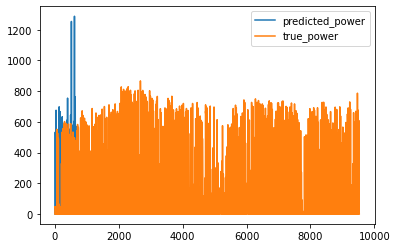

In [26]:
y_predicted2 = x_input2.reshape((x_input2.shape[1]))
plt.plot(y_predicted2, label='predicted_power')

y_true2 = X_valid.dangjin.values
plt.plot(y_true2, label='true_power')
plt.legend()
plt.show()

In [27]:
train_power_series4 = energy.ulsan.values
window = 672
X, y = my_split_window(train_power_series4, window)

In [28]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Conv1D(filters=32, kernel_size=4, activation='relu', 
                                 input_shape=(window, n_features)))
model3.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(50, activation='relu'))
model3.add(tf.keras.layers.Dense(1))
model3.compile(optimizer='adam', loss='mae') 
# fit model
history3 = model3.fit(X, y, epochs=600, verbose=1)

Epoch 1/600
780/780 [==============================] - 10s 12ms/step - loss: 30.4791
Epoch 2/600
780/780 [==============================] - 9s 12ms/step - loss: 17.7368
Epoch 3/600
780/780 [==============================] - 9s 12ms/step - loss: 16.5138
Epoch 4/600
780/780 [==============================] - 9s 12ms/step - loss: 14.5138
Epoch 5/600
780/780 [==============================] - 9s 12ms/step - loss: 15.0194
Epoch 6/600
780/780 [==============================] - 9s 12ms/step - loss: 14.3495
Epoch 7/600
780/780 [==============================] - 9s 12ms/step - loss: 13.7939
Epoch 8/600
780/780 [==============================] - 9s 12ms/step - loss: 13.5539
Epoch 9/600
780/780 [==============================] - 10s 12ms/step - loss: 13.1086
Epoch 10/600
780/780 [==============================] - 9s 12ms/step - loss: 13.5474
Epoch 11/600
780/780 [==============================] - 9s 12ms/step - loss: 12.7849
Epoch 12/600
780/780 [==============================] - 9s 12ms/step - l

780/780 [==============================] - 9s 12ms/step - loss: 4.7361
Epoch 98/600
780/780 [==============================] - 9s 12ms/step - loss: 4.7931
Epoch 99/600
780/780 [==============================] - 9s 12ms/step - loss: 4.9615
Epoch 100/600
780/780 [==============================] - 9s 12ms/step - loss: 4.8332
Epoch 101/600
780/780 [==============================] - 9s 12ms/step - loss: 4.6088
Epoch 102/600
780/780 [==============================] - 9s 12ms/step - loss: 4.5519
Epoch 103/600
780/780 [==============================] - 9s 12ms/step - loss: 4.6598
Epoch 104/600
780/780 [==============================] - 9s 12ms/step - loss: 4.6475
Epoch 105/600
780/780 [==============================] - 9s 12ms/step - loss: 4.7230
Epoch 106/600
780/780 [==============================] - 9s 12ms/step - loss: 4.5446
Epoch 107/600
780/780 [==============================] - 9s 12ms/step - loss: 4.5772
Epoch 108/600
780/780 [==============================] - 9s 12ms/step - loss: 4.6

780/780 [==============================] - 9s 12ms/step - loss: 3.1479
Epoch 193/600
780/780 [==============================] - 9s 12ms/step - loss: 3.1932
Epoch 194/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2389
Epoch 195/600
780/780 [==============================] - 9s 12ms/step - loss: 3.3793
Epoch 196/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2189
Epoch 197/600
780/780 [==============================] - 9s 12ms/step - loss: 3.1711
Epoch 198/600
780/780 [==============================] - 9s 12ms/step - loss: 3.1553
Epoch 199/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2447
Epoch 200/600
780/780 [==============================] - 9s 12ms/step - loss: 3.0362
Epoch 201/600
780/780 [==============================] - 9s 12ms/step - loss: 3.1667
Epoch 202/600
780/780 [==============================] - 9s 12ms/step - loss: 3.2655
Epoch 203/600
780/780 [==============================] - 9s 12ms/step - loss: 3

780/780 [==============================] - 9s 12ms/step - loss: 2.5804
Epoch 288/600
780/780 [==============================] - 9s 12ms/step - loss: 2.5205
Epoch 289/600
780/780 [==============================] - 9s 12ms/step - loss: 2.5621
Epoch 290/600
780/780 [==============================] - 9s 12ms/step - loss: 2.5984
Epoch 291/600
780/780 [==============================] - 9s 12ms/step - loss: 2.5544
Epoch 292/600
780/780 [==============================] - 10s 12ms/step - loss: 2.5000
Epoch 293/600
780/780 [==============================] - 9s 12ms/step - loss: 2.5125
Epoch 294/600
780/780 [==============================] - 9s 12ms/step - loss: 2.4546
Epoch 295/600
780/780 [==============================] - 9s 12ms/step - loss: 2.5429
Epoch 296/600
780/780 [==============================] - 9s 12ms/step - loss: 2.5302
Epoch 297/600
780/780 [==============================] - 9s 12ms/step - loss: 2.4664
Epoch 298/600
780/780 [==============================] - 9s 12ms/step - loss: 

780/780 [==============================] - 9s 12ms/step - loss: 2.2088
Epoch 382/600
780/780 [==============================] - 10s 12ms/step - loss: 2.2144
Epoch 383/600
780/780 [==============================] - 9s 12ms/step - loss: 2.0773
Epoch 384/600
780/780 [==============================] - 9s 12ms/step - loss: 2.1771
Epoch 385/600
780/780 [==============================] - 9s 12ms/step - loss: 2.2549
Epoch 386/600
780/780 [==============================] - 9s 12ms/step - loss: 2.1185
Epoch 387/600
780/780 [==============================] - 9s 12ms/step - loss: 2.1386
Epoch 388/600
780/780 [==============================] - 9s 12ms/step - loss: 2.1522
Epoch 389/600
780/780 [==============================] - 9s 12ms/step - loss: 2.1575
Epoch 390/600
780/780 [==============================] - 9s 12ms/step - loss: 2.1431
Epoch 391/600
780/780 [==============================] - 9s 12ms/step - loss: 2.2330
Epoch 392/600
780/780 [==============================] - 9s 12ms/step - loss: 

780/780 [==============================] - 9s 12ms/step - loss: 1.8787
Epoch 476/600
780/780 [==============================] - 9s 12ms/step - loss: 1.9296
Epoch 477/600
780/780 [==============================] - 9s 12ms/step - loss: 1.8983
Epoch 478/600
780/780 [==============================] - 9s 12ms/step - loss: 1.8609
Epoch 479/600
780/780 [==============================] - 9s 12ms/step - loss: 1.9417
Epoch 480/600
780/780 [==============================] - 9s 12ms/step - loss: 1.9926
Epoch 481/600
780/780 [==============================] - 9s 12ms/step - loss: 2.0904
Epoch 482/600
780/780 [==============================] - 9s 12ms/step - loss: 1.9573
Epoch 483/600
780/780 [==============================] - 9s 12ms/step - loss: 1.9921
Epoch 484/600
780/780 [==============================] - 9s 12ms/step - loss: 1.9498
Epoch 485/600
780/780 [==============================] - 10s 13ms/step - loss: 1.9370
Epoch 486/600
780/780 [==============================] - 10s 12ms/step - loss:

780/780 [==============================] - 9s 12ms/step - loss: 1.6892
Epoch 570/600
780/780 [==============================] - 9s 12ms/step - loss: 1.8448: 0s - loss: 1.
Epoch 571/600
780/780 [==============================] - 9s 12ms/step - loss: 1.7317
Epoch 572/600
780/780 [==============================] - 9s 12ms/step - loss: 1.8564
Epoch 573/600
780/780 [==============================] - 9s 12ms/step - loss: 1.8269
Epoch 574/600
780/780 [==============================] - 10s 12ms/step - loss: 1.7596
Epoch 575/600
780/780 [==============================] - 9s 12ms/step - loss: 1.8333
Epoch 576/600
780/780 [==============================] - 9s 12ms/step - loss: 1.7499
Epoch 577/600
780/780 [==============================] - 9s 12ms/step - loss: 1.8461
Epoch 578/600
780/780 [==============================] - 9s 12ms/step - loss: 1.7541
Epoch 579/600
780/780 [==============================] - 9s 12ms/step - loss: 1.7930
Epoch 580/600
780/780 [==============================] - 9s 12m

In [29]:
# predicting next year
x_input3 = np.array(X_train.ulsan[-672:]) #  next value based on data of last year
x_input3 = x_input3.reshape((1, window, n_features)) # the model expects three dimensions as input (samples, window, features)

for i in range(672):
    y_hat3 = model3.predict(x_input3, verbose=1)
    new_x3 = y_hat3.reshape((1,1,1))
    x_input3 = np.concatenate((x_input3[:, -671:], new_x3), axis=1)

1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 12ms/step


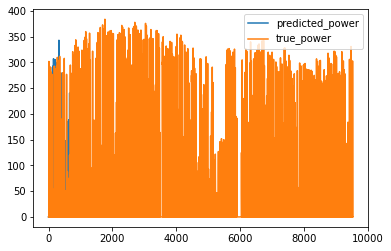

In [30]:
y_predicted3 = x_input3.reshape((x_input3.shape[1]))
plt.plot(y_predicted3, label='predicted_power')

y_true3 = X_valid.ulsan.values
plt.plot(y_true3, label='true_power')
plt.legend()
plt.show()

In [31]:
submission = pd.read_csv(path+'sample_submission.csv')

In [32]:
submission.iloc[:24*28, 1] = y_predicted
submission.iloc[:24*28, 2] = y_predicted1
submission.iloc[:24*28, 3] = y_predicted2
submission.iloc[:24*28, 4] = y_predicted3

In [33]:
submission

,time,dangjin_floating,dangjin_warehouse,dangjin,ulsan
0,2021-02-01 01:00:00,0.000241,-0.000185,-0.001124,-0.000335
1,2021-02-01 02:00:00,0.000241,-0.000185,-0.001124,-0.000335
2,2021-02-01 03:00:00,0.000241,-0.000185,-0.001124,-0.000335
3,2021-02-01 04:00:00,0.000241,-0.000185,-0.001124,-0.000335
4,2021-02-01 05:00:00,0.000241,-0.000185,-0.001124,-0.000335
...,...,...,...,...,...
1387,2021-07-08 20:00:00,0.000000,0.000000,0.000000,0.000000
1388,2021-07-08 21:00:00,0.000000,0.000000,0.000000,0.000000
1389,2021-07-08 22:00:00,0.000000,0.000000,0.000000,0.000000
1390,2021-07-08 23:00:00,0.000000,0.000000,0.000000,0.000000


In [34]:
submission.to_csv(path+'submission_CNN.csv', index=False)